In [1]:
import numpy as np
import matplotlib.pyplot as plt

import functions

from scipy.sparse import csr_matrix

In [2]:
plt.style.use('ggplot')

In [3]:
# Ejercicio 1

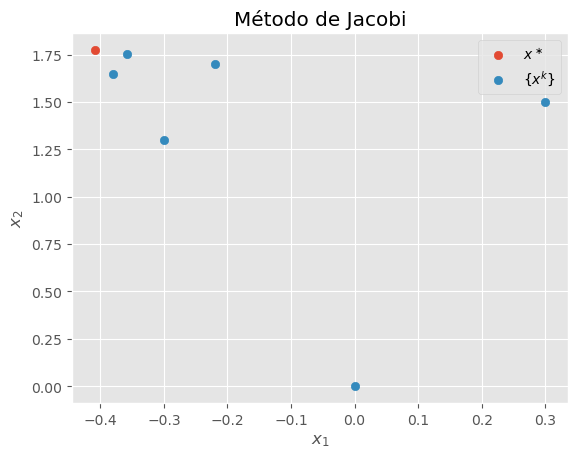

In [4]:
A = np.array([[10, 4], [4, 6]], dtype=float)
b = np.array([3, 9], dtype=float)

x_ast = np.linalg.solve(A, b)

x0 = np.array([0, 0])

x1_j = [x0[0]]
x2_j = [x0[1]]

L = np.tril(A, -1)
D = np.diag(A)
U = np.triu(A, 1)

J = (L + U) / D.reshape(-1, 1)
y = b / D

for i in range(5):

    x_j = y - J @ x0

    x1_j.append(x_j[0])
    x2_j.append(x_j[1])

    x0 = x_j

fig, ax = plt.subplots()
ax.scatter(x_ast[0], x_ast[1], label=r'$x^\ast$')
ax.scatter(x1_j, x2_j, label=r'$\{x^k\}$')
ax.set_title('Método de Jacobi')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.grid(True)
ax.legend()
plt.show()

In [5]:
# Ejercicio 2

In [6]:
def sol_jacobi(A: np.ndarray, b: np.ndarray, x0: np.ndarray, epsilon=1e-10, m=500) -> np.ndarray:
    '''
    Resuelve el sistema lineal Ax = b utilizando el método de Jacobi.
    '''

    assert (np.diag(A) != 0).all(), 'Error: Existe i en {0, 1, ..., n-1} tal que A[i, i] = 0.'

    L = np.tril(A, -1)
    D = np.diag(A)
    U = np.triu(A, 1)

    J = (L + U) / D.reshape(-1, 1)
    y = b / D

    for k in range(m):

        x = y - J @ x0

        if np.linalg.norm(x - x0, ord=np.inf) < epsilon:
            break

        x0 = x

    print('k =', k+1)
    
    return x

In [7]:
def sol_gs(A: np.ndarray, b: np.ndarray, x0: np.ndarray, epsilon=1e-10, m=1000) -> np.ndarray:
    '''
    Resuelve el sistema lineal Ax = b utilizando el método de Gauss-Seidel.
    '''

    assert (np.diag(A) != 0).all(), 'Error: Existe i en {0, 1, ..., n-1} tal que A[i, i] = 0.'

    n = A.shape[0]

    L = np.tril(A, -1)
    D = np.diag(A)
    U = np.triu(A, 1)

    GS = (L + U) / D.reshape(-1, 1)
    y = b / D
    x = x0.copy()

    for k in range(m):

        for i in range(n):
            x[i] = y[i] - GS[i, :] @ x

        if np.linalg.norm(x - x0, ord=np.inf) < epsilon:
            break

        x0 = x.copy()

    print('k =', k+1)
    
    return x

In [8]:
# TEST
n = 5

A = 5 * np.eye(n) + np.random.random((n, n)) - 2 * np.random.random((n, n))
b = np.random.random(n)
x0 = np.zeros(n)

# Método de Jacobi
print('- Método Jacobi')
x_j = sol_jacobi(A, b, x0)
print('x_j =', x_j)
print('||A @ x_j - b|| =', np.linalg.norm(A @ x_j - b))

# Método de Gauss-Seidel
print('\n- Método Gauss-Seidel')
x_gs = sol_gs(A, b, x0)
print('x_gs =', x_j)
print('||A @ x_gs - b|| =', np.linalg.norm(A @ x_gs - b))

# NumPy
print('\n- NumPy')
x_np = np.linalg.solve(A, b)
print('x_np =', x_j)
print('||A @ x_np - b|| =', np.linalg.norm(A @ x_np - b))

- Método Jacobi
k = 30
x_j = [0.33193732 0.14527283 0.32554288 0.20158286 0.36897894]
||A @ x_j - b|| = 2.189417170546419e-10

- Método Gauss-Seidel
k = 16
x_gs = [0.33193732 0.14527283 0.32554288 0.20158286 0.36897894]
||A @ x_gs - b|| = 5.304060106510423e-11

- NumPy
x_np = [0.33193732 0.14527283 0.32554288 0.20158286 0.36897894]
||A @ x_np - b|| = 3.8459253727671276e-16


In [9]:
def sol_cauchy(A: np.ndarray, b: np.ndarray, x: np.ndarray, epsilon=1e-10, m=1000) -> np.ndarray:
    '''
    Resuelve el sistema lineal Ax = b utilizando el método de Cauchy.
    '''

    # d^(k) = r^(k) / ||r^(k)||_2

    # alpha_(k) = r^(k).T @ d^(k) / (d^(k).T @ A @ d^(k))

    # x^(k+1) = x^(k) + alpha_(k) * d^(k)
    # r^(k+1) = r^(k) - alpha_(k) * A @ d^(k)

    r = b - A @ x
    sigma = np.linalg.norm(r, ord=2)

    for k in range(m):

        if sigma < epsilon:
            break

        v = A @ r
        t = sigma**2 / (r.T @ v)

        x = x + t * r
        r = r - t * v

        sigma = np.linalg.norm(r, ord=2)

    print('k =', k+1)

    return x

In [10]:
def sol_gastinel(A: np.ndarray, b: np.ndarray, x: np.ndarray, epsilon=1e-10, m=1000) -> np.ndarray:
    '''
    Resuelve el sistema lineal Ax = b utilizando el método de Gastinel.
    '''

    r = b - A @ x
    sigma = np.linalg.norm(r, ord=1)

    for k in range(m):

        if sigma < epsilon:
            break

        d = np.sign(r)
        v = A @ d
        t = (r.T @ d) / (d.T @ v)

        x = x + t * d 
        r = r - t * v

        sigma = np.linalg.norm(r , ord=1)

    print('k =', k+1)

    return x


In [11]:
# TEST
n = 5

A = np.random.random((n, n))
A = A.T @ A + np.eye(n)
b = np.random.random(n)
x = np.zeros(n)

# Método de Cauchy
print('- Método de Cauchy')
x_cauchy = sol_cauchy(A, b, x)
print('x_cauchy =', x_cauchy)
print('||A @ x_cauchy - b|| =', np.linalg.norm(A @ x_cauchy - b))

# Método de Gastinel
print('- Método de Gastinel')
x_gastinel = sol_gastinel(A, b, x)
print('x_gastinel =', x_gastinel)
print('||A @ x_gastinel - b|| =', np.linalg.norm(A @ x_gastinel - b))

# NumPy
print('- NumPy')
x_np = np.linalg.solve(A, b)
print('x_np =', x_np)
print('||A @ x_np - b|| =', np.linalg.norm(A @ x_np - b))

- Método de Cauchy
k = 44
x_cauchy = [ 0.17396325  0.2367922   0.08125781 -0.01810851 -0.02537629]
||A @ x_cauchy - b|| = 5.7397747383018824e-11
- Método de Gastinel
k = 116
x_gastinel = [ 0.17396325  0.2367922   0.08125781 -0.01810851 -0.02537629]
||A @ x_gastinel - b|| = 4.7201613118514893e-11
- NumPy
x_np = [ 0.17396325  0.2367922   0.08125781 -0.01810851 -0.02537629]
||A @ x_np - b|| = 2.482534153247273e-16


In [12]:
# TEST
n = 5000

E = np.diag(np.ones(n-1), 1) + np.diag(np.ones(n-1), -1)
I = np.eye(n)
A = csr_matrix(4*I - E)

b = np.random.rand(n)

x = np.zeros(n)

A.toarray()

array([[ 4., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  4., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  4., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  4., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  4.]])

In [13]:
%%time
# Método de Cauchy
print('### Método de Cauchy ###')
x_cauchy = sol_cauchy(A, b, x)
print('x_cauchy =', x_cauchy)
print('||A @ x_cauchy - b|| =', np.linalg.norm(A @ x_cauchy - b))

### Método de Cauchy ###
k = 36
x_cauchy = [0.2452716  0.22753851 0.14524449 ... 0.25665762 0.23392654 0.11643112]
||A @ x_cauchy - b|| = 5.784980665104006e-11
CPU times: user 2.13 ms, sys: 1.32 ms, total: 3.45 ms
Wall time: 2.91 ms


In [14]:
%%time
# Descomposición de Cholesky
print('### Cholesky ####')
x_cholesky = functions.sol_defpos(A.toarray(), b)
print('x_cauchy =', x_cauchy)
print('||A @ x_cauchy - b|| =', np.linalg.norm(A @ x_cauchy - b))

### Cholesky ####
x_cauchy = [0.2452716  0.22753851 0.14524449 ... 0.25665762 0.23392654 0.11643112]
||A @ x_cauchy - b|| = 5.784980665104006e-11
CPU times: user 1min 9s, sys: 728 ms, total: 1min 10s
Wall time: 9.92 s


In [15]:
%%time
# NumPy
print('- NumPy')
x_np = np.linalg.solve(A.toarray(), b)
print('x_np =', x_np)
print('||A @ x_np - b|| =', np.linalg.norm(A @ x_np - b))

- NumPy
x_np = [0.2452716  0.22753851 0.14524449 ... 0.25665762 0.23392654 0.11643112]
||A @ x_np - b|| = 6.7042392119743615e-15
CPU times: user 6.39 s, sys: 193 ms, total: 6.59 s
Wall time: 903 ms


In [16]:
# Ejercicio 8

In [17]:
def sol_gradcon(A: np.ndarray, b: np.ndarray, x: np.ndarray, epsilon=1e-10, m=1000) -> np.ndarray:
    '''
    Resuelve el sistema lineal Ax = b utilizando el método del gradiente conjugado.
    '''

    r = b - A @ x
    sigma = np.linalg.norm(r, ord=2)
    d = r.copy()

    for k in range(m):

        if sigma < epsilon:
            break

        v = A @ d 
        t = sigma**2 / (d.T @ v)
        
        x = x + t * d
        r = r - t * v

        sigma_ = np.linalg.norm(r, ord=2)

        s = sigma_**2 / sigma**2

        d = r + s * d

        sigma = sigma_.copy()

    print('k =', k+1)

    return x

In [18]:
# TEST
n = 100

A = np.random.random((n, n))
A = A.T @ A + np.eye(n)
b = np.random.random(n)
x = np.zeros(n)

# Método de Cauchy
print('- Método de Cauchy')
x_cauchy = sol_cauchy(A, b, x)
print('||A @ x_cauchy - b|| =', np.linalg.norm(A @ x_cauchy - b))

# Método del Gradiente Conjugado
print('- Método del Gradiente Conjugado')
x_gradcon = sol_gradcon(A, b, x)
print('||A @ x_gradcon - b|| =', np.linalg.norm(A @ x_gradcon - b))

- Método de Cauchy
k = 1000
||A @ x_cauchy - b|| = 0.7052630981429859
- Método del Gradiente Conjugado
k = 71
||A @ x_gradcon - b|| = 6.18176678559898e-11


In [19]:
# TEST
n = 10000

E = np.diag(np.ones(n-1), 1) + np.diag(np.ones(n-1), -1)
I = np.eye(n)
A = csr_matrix(4*I - E)

b = np.random.rand(n)

x = np.zeros(n)


In [20]:
%%time
# Método de Cauchy
print('### Método de Cauchy ###')
x_cauchy = sol_cauchy(A, b, x)
print('||A @ x_cauchy - b|| =', np.linalg.norm(A @ x_cauchy - b))

### Método de Cauchy ###
k = 36
||A @ x_cauchy - b|| = 8.756288494032546e-11
CPU times: user 5.49 ms, sys: 2.65 ms, total: 8.14 ms
Wall time: 11.3 ms


In [21]:
%%time
# Método del Gradiente Conjugado
print('### Método del Gradiente Conjugado ###')
x_gradcon = sol_gradcon(A, b, x)
print('||A @ x_gradcon - b|| =', np.linalg.norm(A @ x_gradcon - b))

### Método del Gradiente Conjugado ###
k = 22
||A @ x_gradcon - b|| = 4.18123195769915e-11
CPU times: user 2.83 ms, sys: 1.4 ms, total: 4.23 ms
Wall time: 4.58 ms


In [22]:
%%time
# Descomposición de Cholesky
print('### Cholesky ###')
x_cholesky = functions.sol_defpos(A.toarray(), b)
print('x_cauchy =', x_cauchy)
print('||A @ x_cauchy - b|| =', np.linalg.norm(A @ x_cauchy - b))

### Cholesky ###
x_cauchy = [0.29797307 0.22345235 0.21484705 ... 0.09917599 0.17646169 0.20185244]
||A @ x_cauchy - b|| = 8.756288494032546e-11
CPU times: user 6min 31s, sys: 4.2 s, total: 6min 35s
Wall time: 54.8 s
